In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/amazon.csv')

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
df

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1
...,...,...
19995,this app is fricken stupid.it froze on the kin...,0
19996,Please add me!!!!! I need neighbors! Ginger101...,1
19997,love it! this game. is awesome. wish it had m...,1
19998,I love love love this app on my side of fashio...,1


In [ ]:
def df_miniscule(text):
  miniscule = word_tokenize(text.lower())

  text_min = [min for min in miniscule if min not in stopwords.words('english')]

  lemmatizer = WordNetLemmatizer()

  lem = [lemmatizer.lemmatize(min) for min in text_min]

  df_miniscule = ' '.join(lem)

  return df_miniscule


In [ ]:
df['reviewText'] = df['reviewText'].apply(df_miniscule)

In [ ]:
df

,reviewText,Positive
0,one best apps acording bunch people agree bomb...,1
1,pretty good version game free . lot different ...,1
2,really cool game . bunch level find golden egg...,1
3,"silly game frustrating , lot fun definitely re...",1
4,terrific game pad . hr fun . grandkids love . ...,1
...,...,...
19995,app fricken stupid.it froze kindle wont allow ...,0
19996,please add ! ! ! ! ! need neighbor ! ginger101...,1
19997,love ! game . awesome . wish free stuff house ...,1
19998,love love love app side fashion story fight wo...,1


In [ ]:
analyse = SentimentIntensityAnalyzer()

In [ ]:
def sentiment(text):

  scores = analyse.polarity_scores(text)

  sentiment_pers = 1 if scores['pos'] > 0 else 0


  return sentiment_pers

In [ ]:
df['sentiment'] = df['reviewText'].apply(sentiment)

In [ ]:
df

,reviewText,Positive,sentiment
0,one best apps acording bunch people agree bomb...,1,1
1,pretty good version game free . lot different ...,1,1
2,really cool game . bunch level find golden egg...,1,1
3,"silly game frustrating , lot fun definitely re...",1,1
4,terrific game pad . hr fun . grandkids love . ...,1,1
...,...,...,...
19995,app fricken stupid.it froze kindle wont allow ...,0,0
19996,please add ! ! ! ! ! need neighbor ! ginger101...,1,1
19997,love ! game . awesome . wish free stuff house ...,1,1
19998,love love love app side fashion story fight wo...,1,1


In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
print(confusion_matrix(df['Positive'], df['sentiment']))

[[ 1131  3636]
 [  576 14657]]


In [ ]:
from sklearn.metrics import classification_report

In [ ]:

print(classification_report(df['Positive'], df['sentiment']))

              precision    recall  f1-score   support

           0       0.66      0.24      0.35      4767
           1       0.80      0.96      0.87     15233

    accuracy                           0.79     20000
   macro avg       0.73      0.60      0.61     20000
weighted avg       0.77      0.79      0.75     20000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(df['Positive'], df['sentiment'])

print("Matrice de confusion :\n", cm)

report = classification_report(df['Positive'], df['sentiment'])
print("Rapport de classification :\n", report)


Matrice de confusion :
 [[ 1131  3636]
 [  576 14657]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.66      0.24      0.35      4767
           1       0.80      0.96      0.87     15233

    accuracy                           0.79     20000
   macro avg       0.73      0.60      0.61     20000
weighted avg       0.77      0.79      0.75     20000



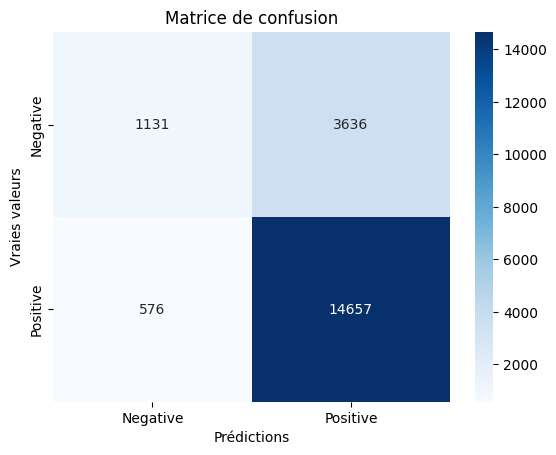

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un heatmap pour la matrice de confusion
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')
plt.show()

